In [25]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error

In [26]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

Считываем данные

In [29]:
data = pd.read_csv("HW/3/train.csv")
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [30]:
dt = pd.to_datetime(data["datetime"])
data["hour"] = dt.map(lambda x: x.hour)
data["day"] = dt.map(lambda x: x.day)
data["month"] = dt.map(lambda x: x.month)
data["year"] = dt.map(lambda x: x.year)
data = data.drop(['datetime', 'registered', 'casual'], axis=1)
data.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hour,day,month,year
0,1,0,0,1,9.84,14.395,81,0.0,16,0,1,1,2011
1,1,0,0,1,9.02,13.635,80,0.0,40,1,1,1,2011
2,1,0,0,1,9.02,13.635,80,0.0,32,2,1,1,2011
3,1,0,0,1,9.84,14.395,75,0.0,13,3,1,1,2011
4,1,0,0,1,9.84,14.395,75,0.0,1,4,1,1,2011


In [32]:
X_data = data.drop(['count'], axis=1)
Y_data = data['count']
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.25)

In [33]:
scaler = StandardScaler()
scaler.fit(X_train, Y_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [19]:
data.dtypes

season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
year            int64
month           int64
day             int64
hour            int64
dtype: object

Делаем категориальные признаки

In [20]:
data["season"] = data["season"].astype('category')
data["holiday"] = data["holiday"].astype('category')
data["workingday"] = data["workingday"].astype('category')
data["weather"] = data["weather"].astype('category')
data["month"] = data["month"].astype('category')
data["day"] = data["day"].astype('category')
data["hour"] = data["hour"].astype('category')

data.dtypes

season        category
holiday       category
workingday    category
weather       category
temp           float64
atemp          float64
humidity         int64
windspeed      float64
casual           int64
registered       int64
count            int64
year             int64
month         category
day           category
hour          category
dtype: object

Удаляем слишком коррелирующие признаки

In [21]:
data.drop(["atemp", "registered"], axis=1, inplace=True)
data.head(10)

,season,holiday,workingday,weather,temp,humidity,windspeed,casual,count,year,month,day,hour
0,1,0,0,1,9.84,81,0.0000,3,16,2011,1,1,0
1,1,0,0,1,9.02,80,0.0000,8,40,2011,1,1,1
2,1,0,0,1,9.02,80,0.0000,5,32,2011,1,1,2
3,1,0,0,1,9.84,75,0.0000,3,13,2011,1,1,3
4,1,0,0,1,9.84,75,0.0000,0,1,2011,1,1,4
5,1,0,0,2,9.84,75,6.0032,0,1,2011,1,1,5
6,1,0,0,1,9.02,80,0.0000,2,2,2011,1,1,6
7,1,0,0,1,8.20,86,0.0000,1,3,2011,1,1,7
8,1,0,0,1,9.84,75,0.0000,1,8,2011,1,1,8
9,1,0,0,1,13.12,76,0.0000,8,14,2011,1,1,9


In [22]:
data.dtypes

season        category
holiday       category
workingday    category
weather       category
temp           float64
humidity         int64
windspeed      float64
casual           int64
count            int64
year             int64
month         category
day           category
hour          category
dtype: object

In [110]:
X = data.drop(columns=['count'], axis=1)
Y = data['count']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=27)

Регрессия с категориальными признаками

In [111]:
scaler = StandardScaler()
scaler.fit(X_train, Y_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [119]:
categ_regr = SGDRegressor()
categ_regr.fit(X_train_scaled, Y_train)
mean_squared_error(Y_test, categ_regr.predict(X_test_scaled))

20565.404539100913

Регрессия без категориальных признаков

In [126]:
X_wo_categ = X.drop(columns=["season", "holiday", "workingday", "weather", "month", "day", "hour"])
Y_wo_categ = Y.drop(columns=["season", "holiday", "workingday", "weather", "month", "day", "hour"])
X_train_wo_categ, X_test_wo_categ, Y_train_wo_categ, Y_test_wo_categ = train_test_split(X_wo_categ, Y_wo_categ , test_size=0.3, random_state=27)

In [127]:
scaler_wo_categ = StandardScaler()
scaler_wo_categ.fit(X_train_wo_categ, Y_train_wo_categ)
X_train_wo_categ_scaled = scaler_wo_categ.transform(X_train_wo_categ)
X_test_wo_categ_scaled = scaler_wo_categ.transform(X_test_wo_categ)

In [128]:
wo_categ_regr = SGDRegressor()
wo_categ_regr.fit(X_train_wo_categ_scaled, Y_train_wo_categ)
mean_squared_error(Y_test_wo_categ, wo_categ_regr.predict(X_test_wo_categ_scaled))

23700.61912363906

Регрессия с one-hot-encode

In [169]:
one_hot_encoder = OneHotEncoder(sparse=False, categorical_features=range(10))
X_ohe = one_hot_encoder.fit_transform(X)
X_ohe_train, X_ohe_test, Y_ohe_train, Y_ohe_test = train_test_split(X_ohe, Y, test_size=0.3)

In [170]:
scaler_ohe = StandardScaler()
scaler_ohe.fit(X_ohe_train, Y_ohe_train)
X_train_ohe_scaled = scaler_ohe.transform(X_ohe_train)
X_test_ohe_scaled = scaler_ohe.transform(X_ohe_test)

In [171]:
ohe_categ_regr = SGDRegressor(tol=1e-3)
ohe_categ_regr.fit(X_train_ohe_scaled, Y_ohe_train)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=0.001, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [172]:
mean_squared_error(Y_ohe_test, ohe_categ_regr.predict(X_test_ohe_scaled))

50231254295526.33

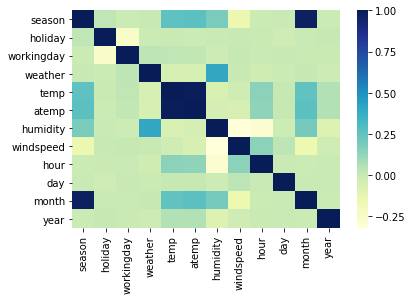

In [173]:
sn.heatmap(X.corr(), cmap="YlGnBu")

In [175]:
OHE = OneHotEncoder(sparse=False, categorical_features=range(10))
OHE = OHE.fit_transform(X_data.drop(['month', 'atemp'], axis=1))

X_train_OHE, X_test_OHE, Y_train, Y_test = train_test_split(OHE, Y_data, test_size=0.3)


In [177]:
scaler_ohe = StandardScaler()
scaler_ohe.fit(X_train_OHE, Y_train)
X_train_ohe_scaled = scaler_ohe.transform(X_train_OHE)
X_test_ohe_scaled = scaler_ohe.transform(X_test_OHE)

In [178]:
ohe_categ_regr = SGDRegressor(tol=1e-3)
ohe_categ_regr.fit(X_train_ohe_scaled, Y_train)
mean_squared_error(Y_test, ohe_categ_regr.predict(X_test_ohe_scaled))

47477102423.506294